In [2]:
import pandas as pd

In [1]:
import numpy as np

In [3]:
files = [
    'api_data_aadhar_biometric_0_500000.csv',
    'api_data_aadhar_biometric_500000_1000000.csv',
    'api_data_aadhar_biometric_1000000_1500000.csv',
    'api_data_aadhar_biometric_1500000_1861108.csv'
]

In [4]:
all_data = []


for file in files:
    print(f"Reading: {file}")
    df_temp = pd.read_csv(file)
    all_data.append(df_temp)


merged_df = pd.concat(all_data, ignore_index=True)


merged_df.to_csv('final_merged_biometric.csv', index=False)

print(f"Success! You now have a single dataset with {len(merged_df)} rows.")

Reading: api_data_aadhar_biometric_0_500000.csv
Reading: api_data_aadhar_biometric_500000_1000000.csv
Reading: api_data_aadhar_biometric_1000000_1500000.csv
Reading: api_data_aadhar_biometric_1500000_1861108.csv
Success! You now have a single dataset with 1861108 rows.


In [6]:
final_merged_biometric = pd.read_csv('final_merged_biometric.csv')

In [7]:
final_merged_biometric.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [8]:
final_merged_biometric.shape

(1861108, 6)

In [9]:
final_merged_biometric.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [10]:
final_merged_biometric.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [11]:
final_merged_biometric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [12]:
final_merged_biometric['date'] = pd.to_datetime(final_merged_biometric['date'], format='%d-%m-%Y')

In [13]:
final_merged_biometric.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
1,2025-03-01,Bihar,Madhepura,852121,144,369
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091
3,2025-03-01,Bihar,Bhojpur,802158,256,980
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815


In [15]:
final_merged_biometric['state'] = final_merged_biometric['state'].str.strip().str.upper()
final_merged_biometric['district'] = final_merged_biometric['district'].str.strip().str.upper()

In [16]:
final_merged_biometric.head(20)

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,HARYANA,MAHENDRAGARH,123029,280,577
1,2025-03-01,BIHAR,MADHEPURA,852121,144,369
2,2025-03-01,JAMMU AND KASHMIR,PUNCH,185101,643,1091
3,2025-03-01,BIHAR,BHOJPUR,802158,256,980
4,2025-03-01,TAMIL NADU,MADURAI,625514,271,815
5,2025-03-01,MAHARASHTRA,RATNAGIRI,416702,155,529
6,2025-03-01,GUJARAT,ANAND,388130,75,143
7,2025-03-01,GUJARAT,GANDHINAGAR,382421,192,298
8,2025-03-01,ODISHA,DHENKANAL,759025,122,214
9,2025-03-01,GUJARAT,VALSAD,396055,67,85


In [18]:
state_fix = {
    'WEST BANGAL': 'WEST BENGAL', 'ORISSA': 'ODISHA', 
    'TAMILNADU': 'TAMIL NADU', 'UTTARANCHAL': 'UTTARAKHAND'
}
final_merged_biometric['state'] = final_merged_biometric['state'].str.strip().str.upper().replace(state_fix)

In [20]:
pip install plotly

In [21]:
import plotly.express as px

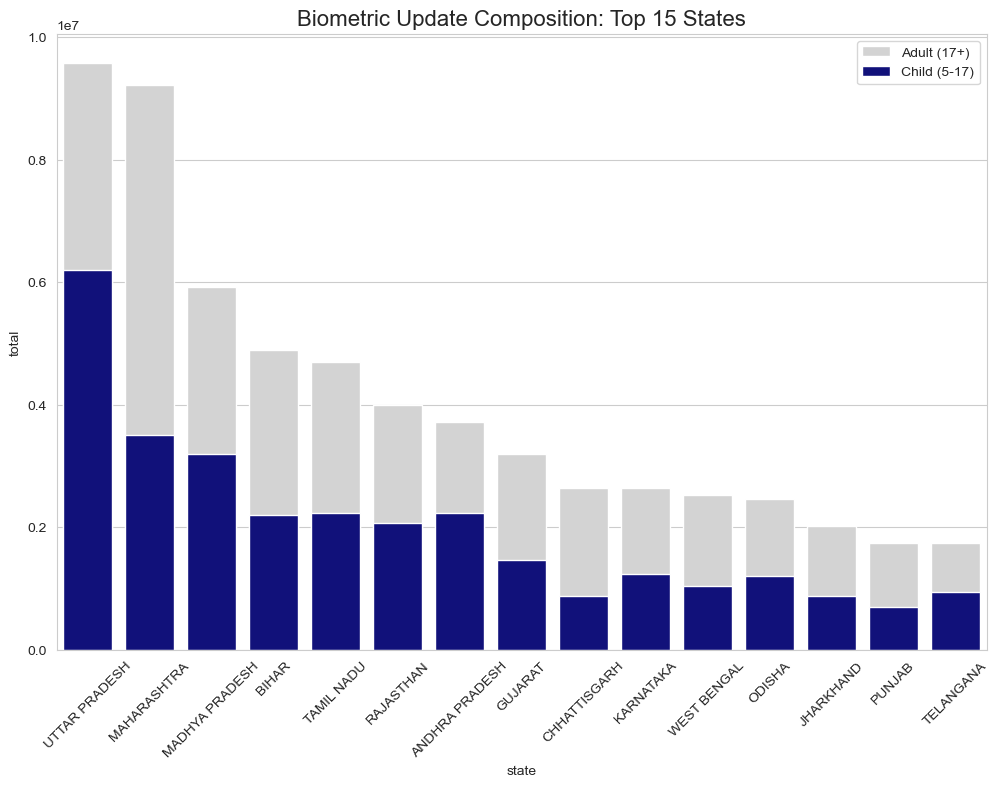

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


state_data = final_merged_biometric.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
state_data['total'] = state_data['bio_age_5_17'] + state_data['bio_age_17_']
state_data = state_data.sort_values('total', ascending=False).head(15) # Top 15 states


plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")


sns.barplot(data=state_data, x='state', y='total', color='lightgrey', label='Adult (17+)')
sns.barplot(data=state_data, x='state', y='bio_age_5_17', color='darkblue', label='Child (5-17)')

plt.title('Biometric Update Composition: Top 15 States', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 📊 Composition Analysis (Normalized)

**Observation:** The Y-axis is normalized to a scale of 0 to 1 (0% to 100%).

**Insight:** This allows us to compare the 'Demographic Priority' of states regardless of their population size. 

**Finding:** If the blue segment (children aged 5-17) is more than 50%, that state focuses more on updating biometric data for children compared to adults. These are called 'Child-First' states.

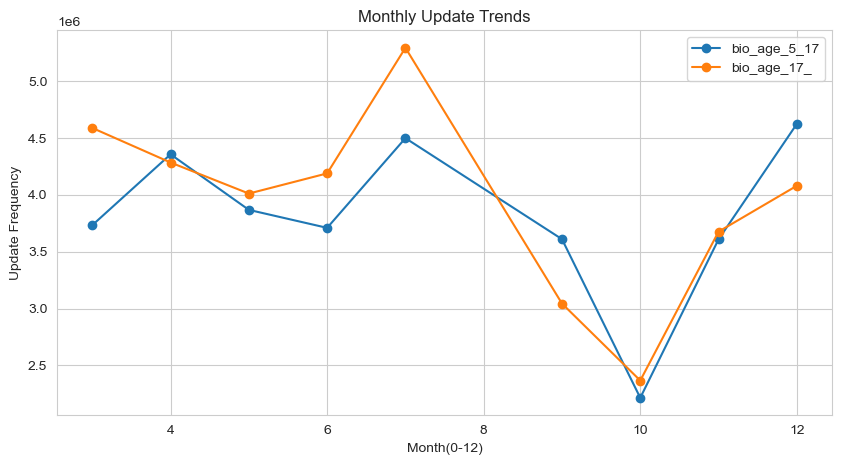

In [32]:
monthly = final_merged_biometric.groupby(final_merged_biometric['date'].dt.month)[['bio_age_5_17', 'bio_age_17_']].sum()
monthly.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Monthly Update Trends')
plt.xlabel('Month(0-12)')
plt.ylabel('Update Frequency')
plt.show()

### 📈 Monthly Trend Analysis

**Key Insight 1: The "Festive Dip" (October)**

**Observation:** The lines drop significantly in month 10 (October).

**Explanation:** During major festivals like Diwali and Dussehra, people visit biometric update centers less frequently due to holiday season and family commitments.

**Key Insight 2: The "Academic Surge" (December)**

**Observation:** The lines shoot up dramatically in month 12, especially for the 5-17 age group (children).

**Explanation:** This is the "Year-End Rush." Schools require updated Aadhaar details for board exam registrations and scholarship renewals that happen in January, leading to a surge in biometric updates for school-going children.

C:\Users\hinal\AppData\Local\Temp\ipykernel_6060\134966592.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




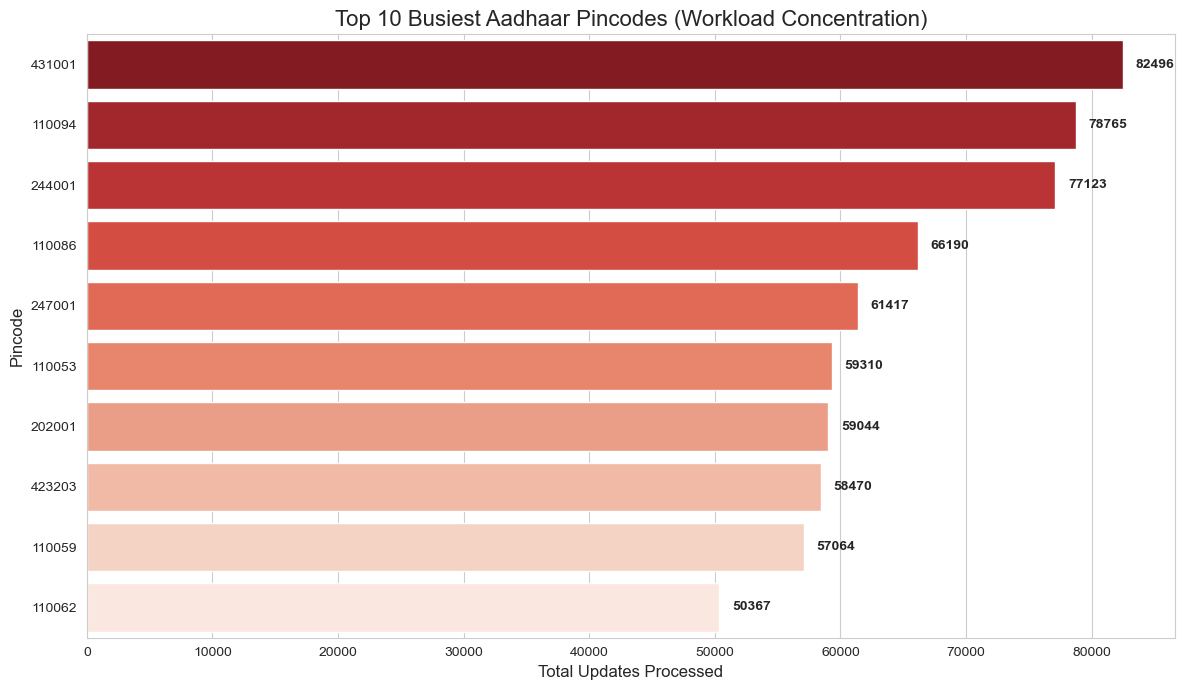

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your dataset (Ensure the filename matches yours)
df = pd.read_csv('final_merged_biometric.csv')

# 2. Group data by Pincode and get the Top 10
pincode_work = df.groupby('pincode').agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum'
}).reset_index()

pincode_work['total'] = pincode_work['bio_age_5_17'] + pincode_work['bio_age_17_']
top_10 = pincode_work.sort_values('total', ascending=False).head(10)

# 3. Create the Horizontal Bar Graph
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# 'y' is the Pincode, 'x' is the Total, palette is 'Reds_r'
sns.barplot(data=top_10, y=top_10['pincode'].astype(str), x='total', palette='Reds_r')

plt.title('Top 10 Busiest Aadhaar Pincodes (Workload Concentration)', fontsize=16)
plt.xlabel('Total Updates Processed', fontsize=12)
plt.ylabel('Pincode', fontsize=12)

# This loop adds the numbers at the end of the bars
for i, value in enumerate(top_10['total']):
    plt.text(value + 1000, i, f'{int(value)}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 🎯 Pincode Analysis: Critical Infrastructure Insights

**1. The "Mega-Center" Phenomenon (Concentration)**

**Observation:** Pincodes like 431001 (Aurangabad) and 110094 (Delhi) are processing nearly 80,000 updates each.

**Insight:** Aadhaar centers are not equally busy. A few "Mega-Centers" handle the workload equivalent to 50 smaller centers combined, creating massive concentration of demand.

**Impact:** These specific centers face the highest risk of hardware failure and service disruption. If one biometric scanner breaks at these locations, 80,000 people are directly affected.

**2. The "Urban Migration" Signal**

**Observation:** 5 out of the top 10 busiest pincodes are located in Delhi (NCR region).

**Insight:** High volumes in Delhi NCR indicate these areas are major hubs for migrant workers who frequently update biometric data or addresses to access essential services like local rations, bank accounts, and gas connections.

**Actionable Recommendation:** UIDAI should prioritize multi-language support and migrant-friendly helpdesks specifically in these 10 high-traffic zones.

**3. The "Service Gap" Identification**

**Observation:** The gap between the #1 busiest pincode and the #10 pincode is over 30,000 updates.

**Insight:** Even among the busiest centers, there exists a massive difference in service load, revealing unequal distribution of demand.

**Strategic Value:** We don't need to fix infrastructure across entire states. Focusing resources on these specific 10 pincodes will solve the biggest bottlenecks affecting the entire country's biometric update system.